In [1]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
pd.set_option('display.max_rows', None)

def resumetable(df):
    print(f'Dataset Shape: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name', 'dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Missing percent'] = df.isnull().sum().values/len(train)
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values



    return summary

In [28]:
train = pd.read_csv("drive/MyDrive/train.csv")
test = pd.read_csv("drive/MyDrive/test.csv")


In [11]:
resumetable(train)

Dataset Shape: (40506, 151)


,Name,dtypes,Missing,Missing percent,Uniques,First Value,Second Value,Third Value
0,Equipment_Dam,object,0,0.000000,2,Dam dispenser #1,Dam dispenser #1,Dam dispenser #2
1,Model.Suffix_Dam,object,0,0.000000,7,AJX75334505,AJX75334505,AJX75334501
2,Workorder_Dam,object,0,0.000000,663,4F1XA938-1,3KPM0016-2,4E1X9167-1
3,CURE END POSITION X Collect Result_Dam,float64,0,0.000000,2,240.0,240.0,1000.0
4,CURE END POSITION Z Collect Result_Dam,float64,0,0.000000,2,2.5,2.5,12.5
5,CURE END POSITION Θ Collect Result_Dam,int64,0,0.000000,2,-90,-90,90
6,CURE SPEED Collect Result_Dam,int64,0,0.000000,5,100,70,85
7,CURE START POSITION X Collect Result_Dam,int64,0,0.000000,2,1030,1030,280
8,CURE START POSITION Θ Collect Result_Dam,int64,0,0.000000,2,-90,-90,90
9,DISCHARGED SPEED OF RESIN Collect Result_Dam,int64,0,0.000000,3,16,10,16


In [29]:
#B
for col in train.columns:
    if len(train[col].unique()) in [0,1]:
        train.drop(col,inplace=True,axis=1)
        test.drop(col,inplace=True,axis=1)

In [30]:
#C
nullcolumn = train.columns[train.isnull().sum()>=29000]
train.drop(nullcolumn,inplace=True,axis=1)
test.drop(nullcolumn,inplace=True,axis=1)

In [31]:
obj_col=list(train.select_dtypes(include=['object']).columns)
obj_col.remove("target")

print(obj_col)

['Equipment_Dam', 'Model.Suffix_Dam', 'Workorder_Dam', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam', 'Model.Suffix_AutoClave', 'Workorder_AutoClave', 'Chamber Temp. Judge Value_AutoClave', 'Equipment_Fill1', 'Model.Suffix_Fill1', 'Workorder_Fill1', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1', 'Equipment_Fill2', 'Model.Suffix_Fill2', 'Workorder_Fill2', 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2']


In [32]:
#E
notobj_col = list(train.select_dtypes(exclude=['object']).columns)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[notobj_col] = scaler.fit_transform(train[notobj_col])
test[notobj_col] = scaler.transform(test[notobj_col])

In [33]:
#F
train.fillna("NOK", inplace=True)
test.fillna("NOK", inplace=True)

<ipython-input-33-e0aae98fcea8>:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'NOK' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  test.fillna("NOK", inplace=True)


In [34]:
train_data, valid_data = train_test_split(
    train,
    test_size=0.2,
    stratify=train['target'],
    random_state=42
)



In [35]:
normal_ratio = 2.0  # 1.0 means 1:1 ratio
RANDOM_STATE = 42
df_normal = train_data[train_data["target"] == "Normal"]
df_abnormal = train_data[train_data["target"] == "AbNormal"]

num_normal = len(df_normal)
num_abnormal = len(df_abnormal)
print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}")

df_normal = df_normal.sample(n=int(num_abnormal * normal_ratio), replace=False, random_state=RANDOM_STATE)
df_concat = pd.concat([df_normal, df_abnormal], axis=0).reset_index(drop=True)
df_concat.value_counts("target")

  Total: Normal: 30524, AbNormal: 1880


,count
target,
Normal,3760
AbNormal,1880


In [18]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.5 MB/s eta 0:00:00


In [36]:

from catboost import CatBoostClassifier
# df_concat.fillna("NOK", inplace=True)
# valid_data.fillna("NOK", inplace=True)
# test.fillna("NOK", inplace=True)

model = CatBoostClassifier(iterations = 2000, random_state = 42)
train_x = df_concat.drop("target",axis=1)
train_y = df_concat["target"]
valid_x = valid_data.drop("target",axis=1)
valid_y = valid_data["target"]
valid_y = [0 if el == 'Normal' else 1 for el in valid_y]
train_y = [0 if el == 'Normal' else 1 for el in train_y]

model.fit(train_x, train_y, cat_features =obj_col)


Learning rate set to 0.011421
0:	learn: 0.6913386	total: 30.5ms	remaining: 1m 1s
1:	learn: 0.6895367	total: 61.3ms	remaining: 1m 1s
2:	learn: 0.6877736	total: 93.2ms	remaining: 1m 2s
3:	learn: 0.6861244	total: 122ms	remaining: 1m
4:	learn: 0.6844201	total: 147ms	remaining: 58.5s
5:	learn: 0.6828161	total: 173ms	remaining: 57.5s
6:	learn: 0.6812708	total: 196ms	remaining: 55.7s
7:	learn: 0.6797573	total: 247ms	remaining: 1m 1s
8:	learn: 0.6781243	total: 272ms	remaining: 1m
9:	learn: 0.6765993	total: 307ms	remaining: 1m 1s
10:	learn: 0.6752071	total: 334ms	remaining: 1m
11:	learn: 0.6738076	total: 362ms	remaining: 60s
12:	learn: 0.6725018	total: 382ms	remaining: 58.4s
13:	learn: 0.6711283	total: 412ms	remaining: 58.4s
14:	learn: 0.6698204	total: 440ms	remaining: 58.3s
15:	learn: 0.6685320	total: 466ms	remaining: 57.8s
16:	learn: 0.6672920	total: 493ms	remaining: 57.5s
17:	learn: 0.6661820	total: 518ms	remaining: 57.1s
18:	learn: 0.6649956	total: 547ms	remaining: 57s
19:	learn: 0.6636953	

In [37]:
from sklearn.metrics import classification_report, f1_score

valid_x = valid_data.drop("target",axis=1)
valid_y = valid_data["target"]
# 모델로 예측
valid_y_pred = model.predict(valid_x)

# df_valid에 실제 타겟값이 있다고 가정 (예: valid_y)

valid_y = [0 if el == 'Normal' else 1 for el in valid_y]

print(np.array(valid_y).shape)
print(np.array(valid_y_pred).shape)
# 정확도 및 기타 지표 계산
print("f1_score:", f1_score(valid_y, valid_y_pred,pos_label = 1))
print(classification_report(valid_y, valid_y_pred))

(8102,)
(8102,)
f1_score: 0.20292504570383915
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      7632
           1       0.18      0.24      0.20       470

    accuracy                           0.89      8102
   macro avg       0.56      0.58      0.57      8102
weighted avg       0.91      0.89      0.90      8102



In [39]:
test_pred = model.predict(test.drop(["target","Set ID"],axis=1))

In [40]:
test_pred = ['Normal' if el == 0 else "AbNormal" for el in test_pred]
df_sub = pd.read_csv("/content/drive/MyDrive/submission.csv")

df_sub["target"] = test_pred

# 제출 파일 저장
df_sub.to_csv("/content/drive/MyDrive/submission21.csv", index=False)

여기 위까지가 결과

Text(0.5, 1.0, 'Feature Importance')

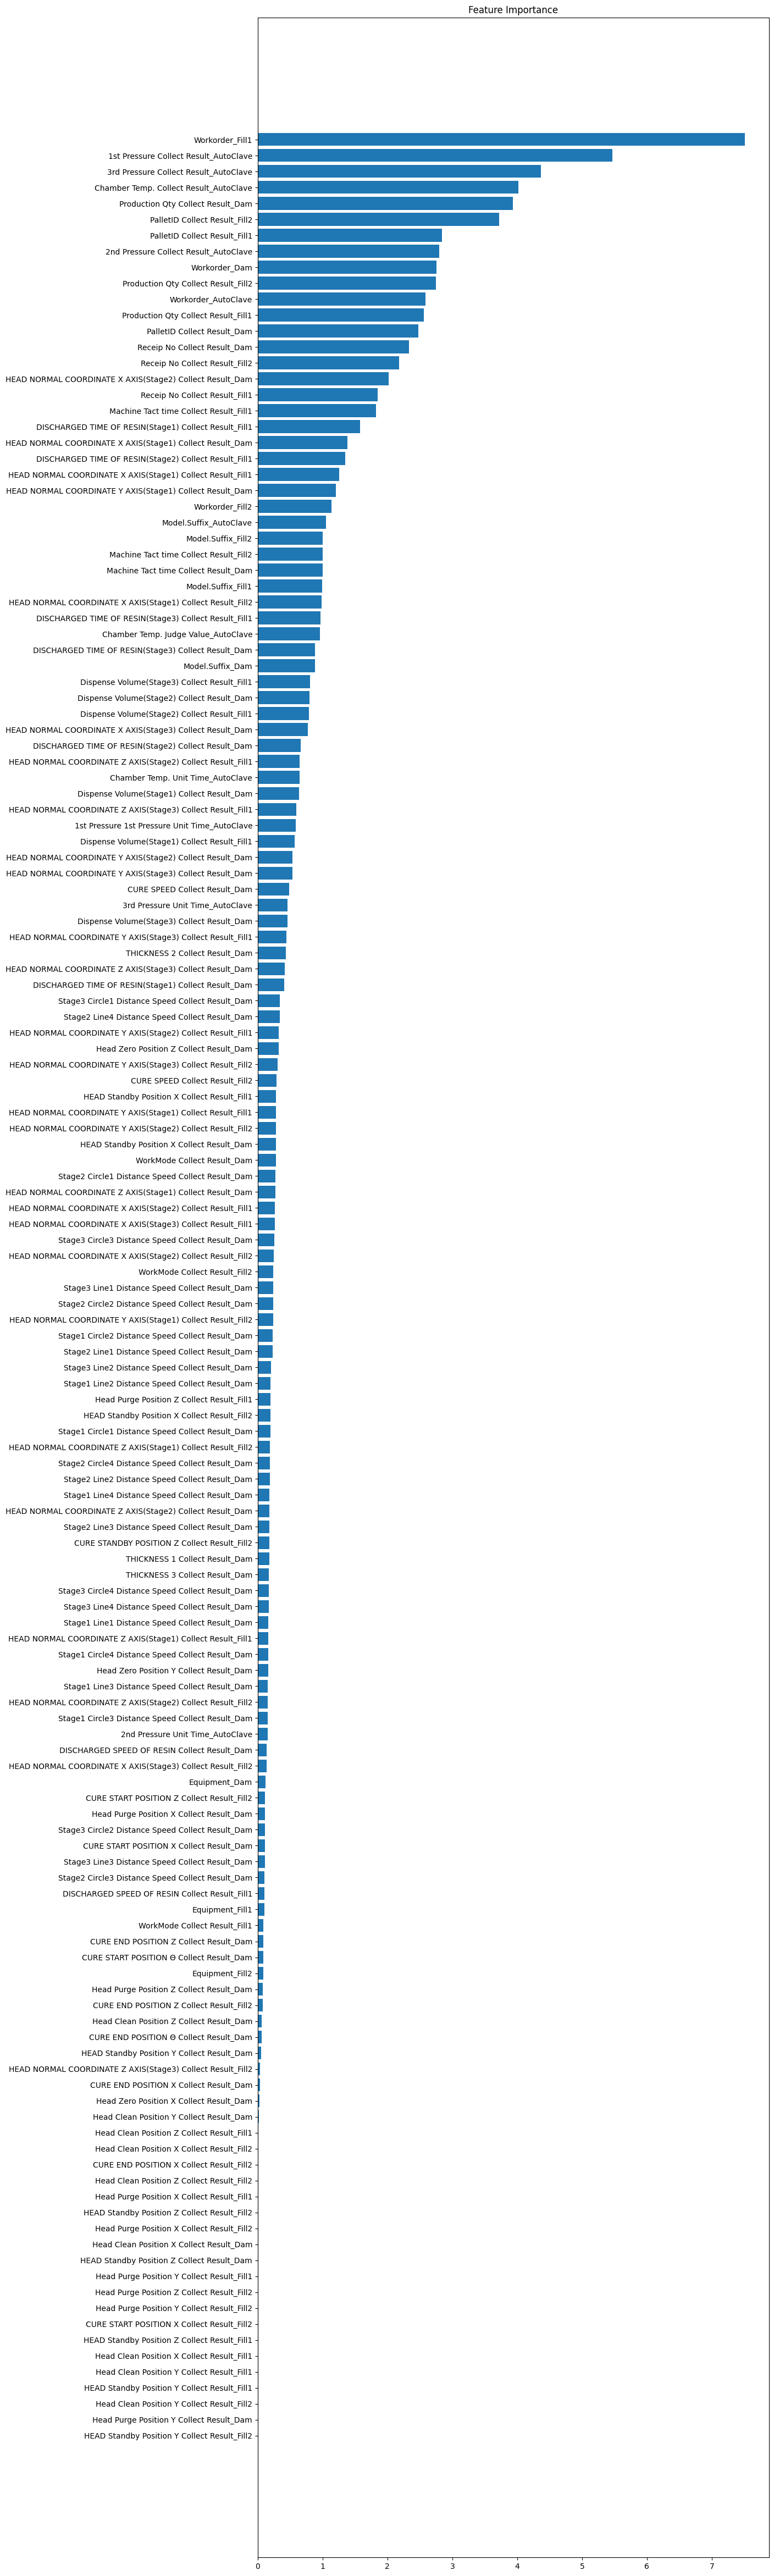

In [38]:
import matplotlib.pyplot as plt
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 60))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(train_x.columns)[sorted_idx])
plt.title('Feature Importance')


In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

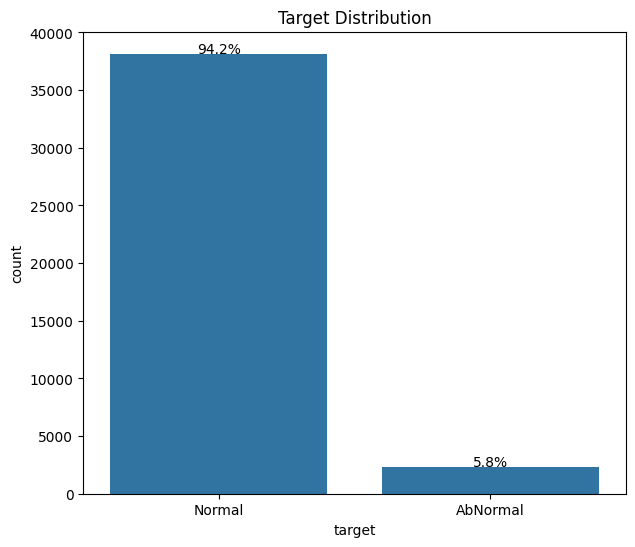

In [ ]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율

        # (x, y) 좌표에 텍스트 입력
        ax.text(x=left_coord + width/2.0,    # x축 위치
                y=height + total_size*0.001, # y축 위치
                s=f'{percent:1.1f}%',        # 입력 텍스트
                ha='center')                 # 가운데 정렬

plt.figure(figsize=(7, 6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train)) # 비율 표시
ax.set_title('Target Distribution');


In [ ]:
columns=train.columns.values
bin_features=[]
for column in columns:
  if len(train[column].value_counts().unique())==2:
    bin_features.append(column)
print(bin_features)
print(len(bin_features))
for column in bin_features:
  if len(test[column].value_counts().unique())!=2:
    print(column)

['Equipment_Dam', 'CURE END POSITION X Collect Result_Dam', 'CURE END POSITION Z Collect Result_Dam', 'CURE END POSITION Θ Collect Result_Dam', 'CURE START POSITION X Collect Result_Dam', 'CURE START POSITION Θ Collect Result_Dam', 'HEAD Standby Position Y Collect Result_Dam', 'HEAD Standby Position Z Collect Result_Dam', 'Head Clean Position X Collect Result_Dam', 'Head Clean Position Y Collect Result_Dam', 'Head Purge Position Y Collect Result_Dam', 'Head Zero Position X Collect Result_Dam', 'Chamber Temp. Judge Value_AutoClave', 'Equipment_Fill1', 'HEAD Standby Position Y Collect Result_Fill1', 'HEAD Standby Position Z Collect Result_Fill1', 'Head Clean Position X Collect Result_Fill1', 'Head Clean Position Y Collect Result_Fill1', 'Head Clean Position Z Collect Result_Fill1', 'Head Purge Position X Collect Result_Fill1', 'Head Purge Position Y Collect Result_Fill1', 'Equipment_Fill2', 'CURE END POSITION X Collect Result_Fill2', 'CURE START POSITION X Collect Result_Fill2', 'HEAD NO

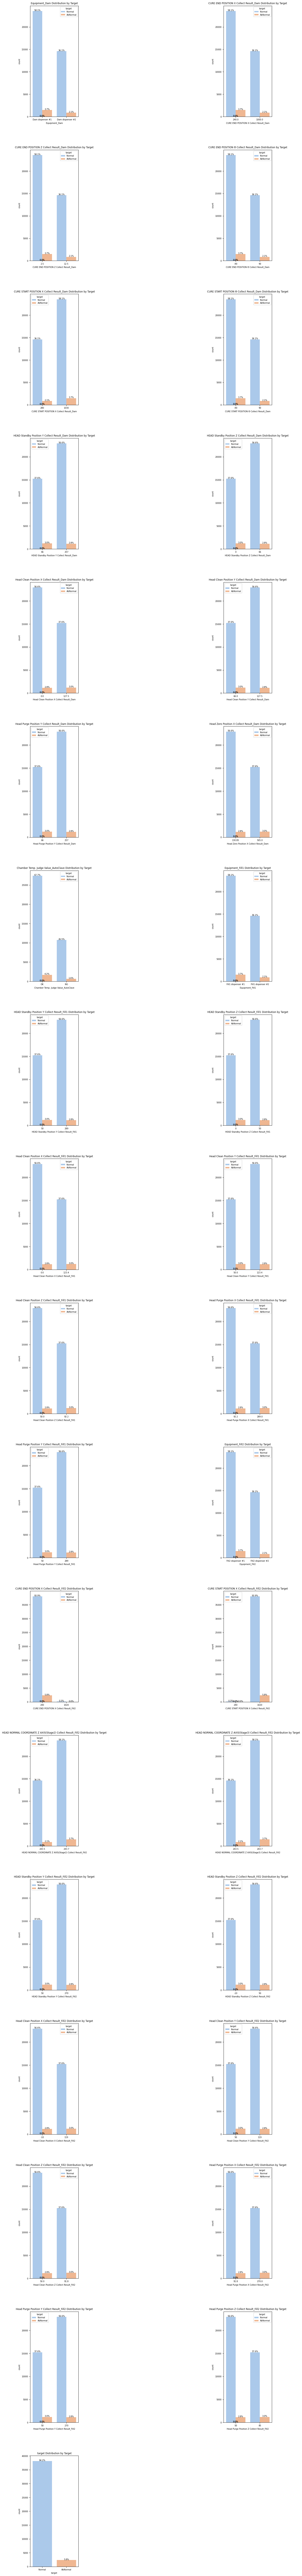

In [ ]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치

# 3행 2열 틀(Figure) 준비
mpl.rc('font', size=7)
grid = gridspec.GridSpec(18, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(15, 160))   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=3, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기


for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])

    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature,
                  data=train,
                  hue='target',
                  palette='pastel', # 그래프 색상 설정
                  ax=ax)

    ax.set_title(f'{feature} Distribution by Target') # 그래프 제목 설정
    write_percent(ax, len(train))